# Unsupervised Learning

[Wiki] Unsupervised methods exhibit self-organization that captures patterns as probability densities or a combination of neural feature preferences.

Unsupervised learning: No labels are given to the learning algorithm,
leaving it on its own to find structure in its input. Unsupervised learning
can be a goal in itself (discovering hidden patterns in data) or a means
towards an end (feature learning).

[Data Mining] Data mining is an automatic process of extracting and discovering hidden patterns (relations) in large data sets.

### Data

#### Data Problem

<table>
<tr><th>Problem</th><th>Cause</th></tr>
<tr><td>Inaccuracte</td><td>資料值超出合理範圍</td></tr>
<tr><td>Inconsistence</td><td>不同來源資料合併後出現分歧(單位不一, 編碼不一)</td></tr>
<tr><td>Repeated</td><td>重複紀錄的數值或是欄位</td></tr>
<tr><td>Redundant</td><td>重複出現意義相同的資料或欄位(年薪=月薪+獎金)</td></tr>
<tr><td>Missing</td><td>設備或人為造成的資料遺漏</td></tr>
<tr><td>Noise</td><td>資料本身的誤差或輸入錯誤</td></tr>
<tr><td>Outlier</td><td>資料本身的特性或不當測量或輸入錯誤</td></tr>
<tr><td>Scale</td><td>資料型態不符合演算法使用</td></tr>
<tr><td>Too much data</td><td>資料過多或維度過高</td></tr>
</table>

#### Normalization and Standardization

* Z-Score Standardization
$Z = \frac{x-\mu}{\sigma} \sim N(0.0, 1.0)$

* Min-Max Normalization
$X' = \frac{X-X_{min}}{X_{max}-X_{min}} \in [0.0, 1.0]$

* Mean Normalization
$X' = \frac{X- \mu}{X_{max}-X_{min}} \in [-1.0, 1.0]$

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


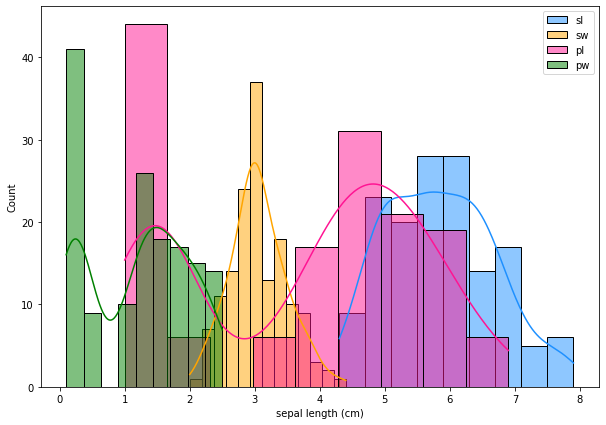

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.histplot(iris_df['sepal length (cm)'], color="dodgerblue", label="sl", kde=True)
sns.histplot(iris_df['sepal width (cm)'], color="orange", label="sw", kde=True)
sns.histplot(iris_df['petal length (cm)'], color="deeppink", label="pl", kde=True)
sns.histplot(iris_df['petal width (cm)'], color="green", label="pw", kde=True)
plt.legend()
plt.show()

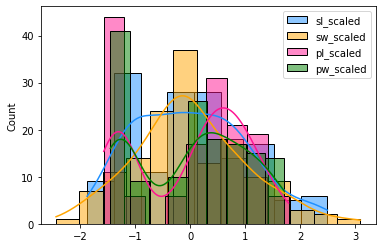

In [ ]:
from sklearn import preprocessing
# you can try 'StandardScaler()', 'MinMaxScaler()', 'MaxAbsScaler()'
# 'Normalizer()', ...
# https://scikit-learn.org/stable/modules/preprocessing.html

sl_scaled = preprocessing.scale(iris_df['sepal length (cm)'], axis=0, with_mean=True, with_std=True, copy=True)
sw_scaled = preprocessing.scale(iris_df['sepal width (cm)'], axis=0, with_mean=True, with_std=True, copy=True)
pl_scaled = preprocessing.scale(iris_df['petal length (cm)'], axis=0, with_mean=True, with_std=True, copy=True)
pw_scaled = preprocessing.scale(iris_df['petal width (cm)'], axis=0, with_mean=True, with_std=True, copy=True)

sns.histplot(sl_scaled, color="dodgerblue", label="sl_scaled", kde=True)
sns.histplot(sw_scaled, color="orange", label="sw_scaled", kde=True)
sns.histplot(pl_scaled, color="deeppink", label="pl_scaled", kde=True)
sns.histplot(pw_scaled, color="green", label="pw_scaled", kde=True)
plt.legend()
plt.show()

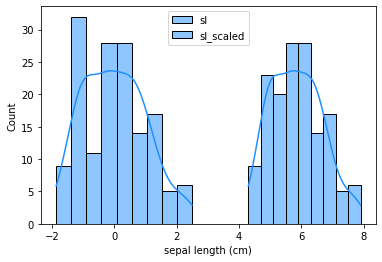

In [ ]:
sns.histplot(iris_df['sepal length (cm)'], color="dodgerblue", label="sl", kde=True)
sns.histplot(sl_scaled, color="dodgerblue", label="sl_scaled", kde=True)
plt.legend()
plt.show()

#### Scale
* Nominal Scale (名目尺度)
  * The nominal type differentiates between items or subjects based only on their names or (meta-)categories and other qualitative classifications they belong to.
  * 名目尺度下所衡量的數字僅是作為代碼, 數字大小不具任何意義, 也不能作數
學運算。因此有意義的轉換方式必須是一對一的。

<!-- * Categorical Scale (類別尺度)
  * 類別尺度是將欲評估的資料依其特徵分類,再將每一個類別標示一個數字代碼。
-->

* Ordinal Scale (順序尺度)
  * The ordinal type allows for rank order (1st, 2nd, 3rd, etc.) by which data can be sorted, but still does not allow for relative degree of difference between them.
  * 所衡量的數字表示資料之間的大小關係。可以使用嚴格遞增函數轉換。

* Interval/Distance Scale (間距尺度)
  * The interval type allows for the degree of difference between items, but not the ratio between them. Examples include temperature scales with the Celsius scale.
  * 間距尺度所衡量的數字可以有意義地描述並比較數字之間的差距大小。可做線
性轉換。

* Ratio Scale (比率尺度)
  * The ratio type takes its name from the fact that measurement is the estimation of the ratio between a magnitude of a continuous quantity and a unit of measurement of the same kind. Most measurement in the physical sciences and engineering is done on ratio scales. 
  * 資料可以做倍率之間的比較。具有固定零點。

* Absolute Scale (絕對尺度)
  * It is simply a ratio scale in which the unit of measurement is fixed, and values are obtained by counting, e.g., probabilities, time. 
  * 數字具有絕對的意義, 無法做其他有意義的轉換, 例如: 機率值。

#### Descriptive Statistics

In [ ]:
iris_df['sepal length (cm)'].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal length (cm), dtype: float64

### Distance

If we do not have a specific target to learn, what else we can do to find the 'hidden' relation between these data points?

What is the property of 'distance'?
* symmetric
* distance $\leftrightarrow$ similarity

If the range of distance is between 0.0 and 1.0, then the defition of similarity can be simply be (1 $-$ distance). 

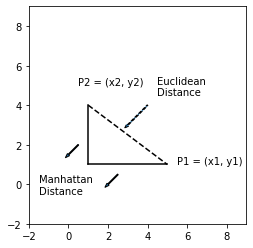

In [ ]:
fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='box')
plt.plot([1, 1], [1, 4], 'k')# [x1, x2] [y1, y2]
plt.plot([1, 5], [1, 1], 'k')
plt.plot([1, 5], [4, 1], "k--")
plt.text(5.5, 1, 'P1 = (x1, y1)')
plt.text(0.5, 5, 'P2 = (x2, y2)')
plt.text(4.5, 4.5, 'Euclidean\nDistance')
plt.arrow(4, 4, -1, -1, width = 0.05, ls='--')
plt.text(-1.5, -0.5, 'Manhattan\nDistance')
plt.arrow(2.5, 0.5, -0.5, -0.5, width = 0.05)
plt.arrow(0.5, 2, -0.5, -0.5, width = 0.05)
plt.xlim(-2, 9)
plt.ylim(-2, 9)
plt.show()

Euclidean Distance $= [|x_1-x_2|^2 + |y_1-y_2|^2]^\frac{1}{2}$

Manhattan Distance $= |x_1-x_2| + |y_1-y_2|$


Minkowski distance $ = (\sum_{i=1}^{n} |x_i - y_i|^p )^\frac{1}{p}$

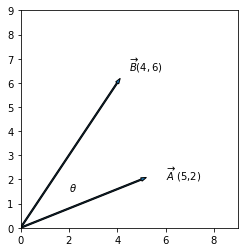

In [ ]:
fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='box')
plt.text(2, 1.5, r'$\theta$')
plt.text(6, 2, r'$\overrightarrow{A}$ (5,2)')
plt.text(4.5, 6.5, r'$\overrightarrow{B} (4,6)$')
plt.arrow(0, 0, 5, 2, width = 0.05)
plt.arrow(0, 0, 4, 6, width = 0.05)
plt.xlim(0, 9)
plt.ylim(0, 9)
plt.show()

Definition: $\overrightarrow{A} \cdot \overrightarrow{B} = ||A||*||B||*cos\theta$

Cosine similarity $ = cos\theta = \frac{\overrightarrow{A} \cdot \overrightarrow{B}}{||A||*||B||} = \frac{\sum_{i=1}^{n} A_i B_i}{\sqrt{\sum_{i=1}^{n} A^2} \sqrt{\sum_{i=1}^{n} B^2}}$

range = [-1.0, +1.0], how about 0.0?

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
print('cosine_similarity:', cosine_similarity([[5,2]], [[4,6]]))

cosine_similarity: [[0.82404192]]


In [ ]:
# try [-9,-9], [9,-9], [6,6], [0,0], ...
print('cosine_similarity:', cosine_similarity([[9,9]], [[9,9]]))

cosine_similarity: [[1.]]


#### Simple Matching Distance
https://en.wikipedia.org/wiki/Simple_matching_coefficient

For evaluating the distance of data points (e.g., $i$ and $j$) with only binary features (e.g., Gender, $F_2$, $F_3$, $\cdots$).

<table>
<tr><th>Name</th><th>Gender</th><th>$F_2$</th><th>$F_3$</th><th>$F_4$</th><th>$F_5$</th></tr>
<tr><td>Jack</td><td>M</td><td>True</td><td>N</td><td>postive</td><td>No</td></tr>
<tr><td>Jim</td><td>M</td><td>True</td><td>Y</td><td>negative</td><td>No</td></tr>
<tr><td>Marry</td><td>F</td><td>True</td><td>N</td><td>negative</td><td>No</td></tr>
</table>

<table>
<tr><td></td><td colspan = "3" align = "center">i</td></tr>
<tr><td rowspan ="3">j</td><td></td><td>0</td><td>1</td></tr>
<tr><td>0</td><td>a</td><td>b</td></tr>
<tr><td>1</td><td>c</td><td>d</td></tr>
</table>

$SMD(i,j) = d(i,j) = \frac{b+c}{a+b+c+d}$

simple matching coefficient (SMC) = 1 - SMD.


#### Jaccard Similarity
aka Jaccard index, Jaccard similarity coefficient

$J(A, B) = \frac{| A \cap B |}{| A \cup B|}$

Jacarrd Distance = $ = d_{J}(A,B) = 1 - J(A,B)$


#### Distance Matrix

We can further constuct a matrix to represent the distances between each pair of data points.

In [ ]:
# Matrix of 5 vectors in 3 dimensions.
mx = np.random.random((5, 3))
mx

array([[0.34915671, 0.3558374 , 0.10503738],
       [0.82775728, 0.06381031, 0.33669665],
       [0.6016534 , 0.44522687, 0.4509595 ],
       [0.39753331, 0.55129623, 0.3225947 ],
       [0.15938722, 0.4161085 , 0.71558386]])

In [ ]:
# the distance matrix, it is symmetric!
from scipy.spatial import distance_matrix
distance_matrix(mx, mx)

array([[0.        , 0.60663362, 0.43750104, 0.29643825, 0.64219317],
       [0.60663362, 0.        , 0.45788378, 0.65033381, 0.84521481],
       [0.43750104, 0.45788378, 0.        , 0.26342598, 0.51621052],
       [0.29643825, 0.65033381, 0.26342598, 0.        , 0.47898827],
       [0.64219317, 0.84521481, 0.51621052, 0.47898827, 0.        ]])

### Clustering

We can plot all the data points in a space (and calculate the distance between each pair of them). It is quite straightforward to make clusers if they exist. 

[Wiki] Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more **similar** (in some sense) to each other than to those in other groups (clusters).

Popular notions of clusters include groups with small distances between cluster members, dense areas of the data space, intervals or particular statistical distributions.

### Centroid-based clustering: K-means

http://nbviewer.jupyter.org/github/flothesof/posts/blob/master/20150717_Kmeans.ipynb

In [ ]:
# vstack(): Stack arrays in sequence vertically (row wise).
# Take a sequence of arrays and stack them vertically to make a single array. 
points = np.vstack([np.random.randn(150, 2) * 0.75 + np.array([1, 0]),
                    np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5]),
                    np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5])])

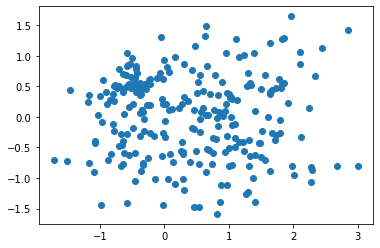

In [ ]:
# Plot random generated data
# scatter(x, y)
plt.scatter(points[:, 0], points[:, 1])

# plot hidden centers
ax.set_aspect('equal', adjustable='box') # make the figure squared
ax.add_artist(plt.Circle(np.array([1, 0]), 0.75/2, fill=False, lw=2))
ax.add_artist(plt.Circle(np.array([-0.5, 0.5]), 0.25/2, fill=False, lw=2))
ax.add_artist(plt.Circle(np.array([-0.5, -0.5]), 0.5/2, fill=False, lw=2))

In [ ]:
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

In [ ]:
# Try it out
initialize_centroids(points, 3)

array([[ 0.78180495,  0.69068911],
       [-0.78188198,  0.26454389],
       [ 1.67729493, -0.27022439]])

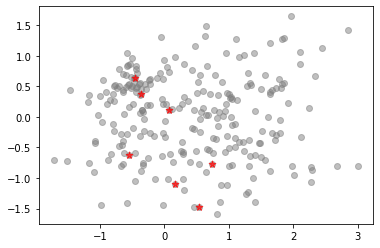

In [ ]:
plt.scatter(points[:, 0], points[:, 1], c='grey', alpha=0.5)
centroids = initialize_centroids(points, 7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50, marker='*', alpha=0.7)

# https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter

In [ ]:
def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2)) # broadcast
    return np.argmin(distances, axis=0) # Returns the indices of the minimum values along an axis.

In [ ]:
# broadcast: it is a useful numpy 'syntactic sugar‘ to deal with array
# https://numpy.org/doc/stable/user/basics.broadcasting.html
print(points.shape)
print(centroids[:, np.newaxis].shape)
print((points - centroids[:, np.newaxis]).shape)
print(points - centroids[:, np.newaxis])

(250, 2)
(7, 1, 2)
(7, 250, 2)
[[[-5.49063773e-01  2.81640298e-02]
  [ 1.74173938e+00  6.60097211e-01]
  [ 4.37057079e-01  1.16976147e+00]
  ...
  [-9.93015502e-01  8.77043485e-01]
  [-9.82615019e-01  4.30638444e-01]
  [-1.70335537e+00  1.83218535e+00]]

 [[ 5.31414687e-01 -8.29728483e-01]
  [ 2.82221784e+00 -1.97795302e-01]
  [ 1.51753554e+00  3.11868960e-01]
  ...
  [ 8.74629581e-02  1.91509720e-02]
  [ 9.78634412e-02 -4.27254069e-01]
  [-6.22876911e-01  9.74292838e-01]]

 [[ 3.42751261e-01 -1.81488069e+00]
  [ 2.63355441e+00 -1.18294751e+00]
  [ 1.32887211e+00 -6.73283243e-01]
  ...
  [-1.01200468e-01 -9.66001231e-01]
  [-9.07999852e-02 -1.41240627e+00]
  [-8.11540338e-01 -1.08593648e-02]]

 ...

 [[ 4.34362568e-01 -2.07782865e+00]
  [ 2.72516572e+00 -1.44589547e+00]
  [ 1.42048342e+00 -9.36231205e-01]
  ...
  [-9.58916144e-03 -1.22894919e+00]
  [ 8.11321670e-04 -1.67535423e+00]
  [-7.19929031e-01 -2.73807327e-01]]

 [[-9.15926199e-02 -1.55549769e+00]
  [ 2.19921053e+00 -9.23564504e

In [ ]:
# Try
c = initialize_centroids(points, 3)
cc = closest_centroid(points, c)
print(c)
print(cc)

[[ 1.31915528 -0.37647072]
 [ 0.30763251 -1.20264856]
 [ 2.44067703  1.12794887]]
[1 0 0 0 0 2 0 2 1 0 0 0 0 0 0 0 0 0 0 1 1 0 2 0 0 2 1 0 1 0 2 0 2 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 2 2 0 0 0 1 0 0 1 1 2 1
 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 2 0 0 2 0 0 2 2 0 1 0
 2 1 1 0 1 0 0 0 0 0 0 1 0 1 0 2 2 0 1 2 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0
 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1
 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [ ]:
new_centroids = move_centroids(points, closest_centroid(points, centroids), centroids)
print(new_centroids)

[[ 0.81841749 -1.46548854]
 [-0.69293199 -0.58346557]
 [-0.45612517  0.27034637]
 [ 1.40020401 -0.32433598]
 [-0.43902222  0.68930285]
 [ 0.79104551  0.41513591]
 [ 0.09622525 -0.97670479]]


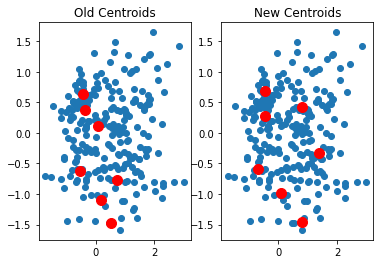

In [ ]:
ax = plt.subplot(121)
ax.set_title("Old Centroids")
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

ax = plt.subplot(122)
ax.set_title("New Centroids")
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c='r', s=100)

#### Iteration

First, ramdon choose data points as centroids.

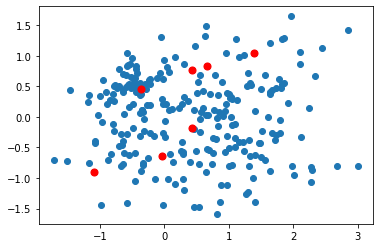

In [ ]:
# init
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)

Then, make clusters by using the distance of nearest centroid.

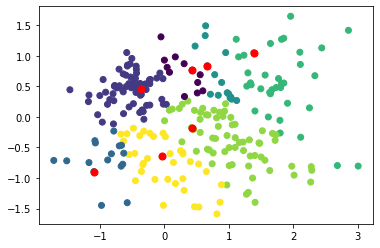

In [ ]:
closest = closest_centroid(points, centroids)
plt.scatter(points[:, 0], points[:, 1], c=closest)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)

Remove centroids.

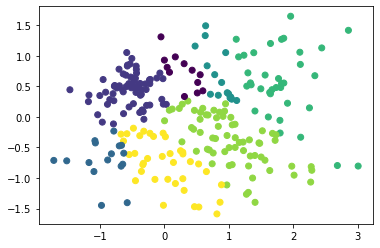

In [ ]:
plt.scatter(points[:, 0], points[:, 1], c=closest)

Using the current cluster to choose new (virtual) centroids.

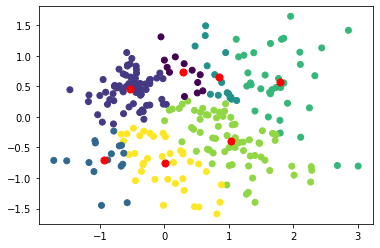

In [ ]:
# run this block multiple times to get 'better' centroids

centroids = move_centroids(points, closest, centroids)
plt.scatter(points[:, 0], points[:, 1], c=closest)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)

#### Animation

In [ ]:
import ipywidgets
# jupyter nbextension enable --py --sys-prefix widgetsnbextension

In [ ]:
# init
centroids = initialize_centroids(points, 7)
print(centroids)

[[ 0.55663268  0.68905442]
 [ 1.81716716  0.54542428]
 [ 1.79268494 -0.0569788 ]
 [-0.43308645  0.77591531]
 [ 0.53220635 -0.77083333]
 [-1.17584508  0.24902306]
 [ 0.66429961  0.83505172]]


In [ ]:
# iter
def f(x):
    global points, centroids, closest
    
    if x == 0: # print init points and random-selected starting points
        plt.scatter(points[:, 0], points[:, 1])
        plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)
        plt.show()
        print("print init points and random-selected starting points")
    elif x % 3 == 1: # color the points by the closest centroids
        closest = closest_centroid(points, centroids)
        plt.scatter(points[:, 0], points[:, 1], c=closest)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)
        plt.show()
        print("color the points by the closest centroids")
    elif x % 3 == 2: # show the color points only
        plt.scatter(points[:, 0], points[:, 1], c=closest)
        plt.show()
        print("show the color points only")
    else: # find the new centroids
        centroids = move_centroids(points, closest, centroids)
        plt.scatter(points[:, 0], points[:, 1], c=closest)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)
        plt.show()
        print("find the new centroids")

In [ ]:
# http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html

ipywidgets.interact(f, x = ipywidgets.FloatSlider(min = 0.0, max = 50.0, step = 1.0, value = 0.0))

interactive(children=(FloatSlider(value=0.0, description='x', max=50.0, step=1.0), Output()), _dom_classes=('w…

<function __main__.f>

#### Discussion (K-means)
* K-means clustering needs the number of clusters to be speciﬁed.
* K-means assume that clusters have similar density.
* K-means is sensitive to outliers; K-means is sensitive to initial points and local optimal.
* K-means is linear in the number of data objects i.e., $O(n)$, where $n$ is the number of data objects. The time complexity of most of the hierarchical clustering algorithms is quadratic i.e., $O(n^2)$.
* K-means works well when the shape of clusters are hyper-spherical (or circular in 2 dimensions). If the natural clusters occurring in the dataset are non-spherical then probably K-means is not a good choice.
* K-means starts with a random choice of cluster centers, therefore it may yield different clustering results on different runs of the algorithm. Thus, the results may not be repeatable and lack consistency. However, with hierarchical clustering, you will most definitely get the same clustering results.
* How the choose $K$?

#### How to choose K?


In [ ]:
# How the choose K?
# A) The number of data points in each cluster.

unique, counts = np.unique(closest, return_counts=True)
print(dict(zip(unique, counts)))

{0: 46, 1: 51, 2: 46, 3: 37, 4: 22, 5: 29, 6: 19}


In [ ]:
# How the choose K?
# B) calculate avgWithinSS

In [ ]:
import numpy as np
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# load the iris dataset
#ith open('iris.txt') as fp:
#    X = np.loadtxt(fp)
X = points

##### cluster data into K=1..9 clusters #####
K = range(1,10)

# scipy.cluster.vq.kmeans
KM = [kmeans(X,k) for k in K]
centroids = [cent for (cent,var) in KM]   # cluster centroids
#avgWithinSS = [var for (cent,var) in KM] # avg within-cluster squared error

# alternative: scipy.spatial.distance.cdist
# Compute distance between each pair of the two collections of inputs.
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

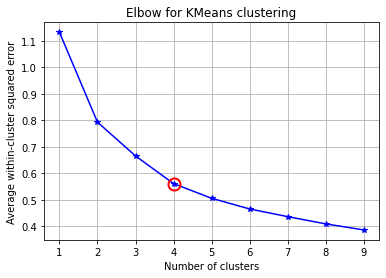

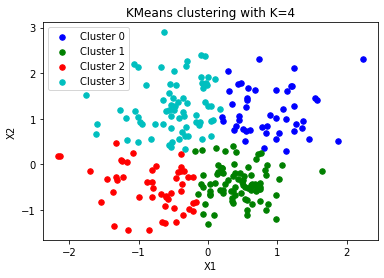

In [ ]:
##### plot ###
kIdx = 3 # <----- you can change k 

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster squared error')
plt.title('Elbow for KMeans clustering')

# scatter plot
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.scatter(X[:,2],X[:,1], s=30, c=cIdx[k])
clr = ['b','g','r','c','m','y','k']
for i in range(K[kIdx]):
    ind = (cIdx[kIdx]==i)
    ax.scatter(X[ind,1],X[ind,0], s=30, c=clr[i], label='Cluster %d'%i)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('KMeans clustering with K=%d' % K[kIdx])
plt.legend()

plt.show()

#### What else?

* K-menas: the center of a cluster is not necessarily one of the input data points (it is the average between the points in the cluster).
* K-mode: can deal with **categorial data**; need a distance funtion for data points with categorial features.
* K-mediods: k-medoids chooses **actual data points** as centers (medoids or exemplars), and thereby allows for greater interpretability of the cluster centers than in k-means.

#### sklearn k-means w/ PCA



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html
digits = load_digits()
data = scale(digits.data) # !!!

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

print("n_digits(classes): %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))

n_digits(classes): 10, 	 n_samples 1797, 	 n_features 64


In [ ]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

KMeans(n_clusters=10)

In [ ]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

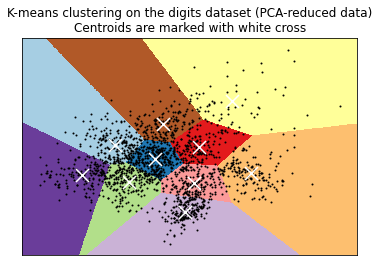

In [ ]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### k-Nearest Neighbors (A supervised learning)

http://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/


k-NN is a supervised learning, but it highly depends on the concpet of 'distance' (so I put this algorithm here).

The model for kNN is the entire training dataset. When a prediction is required for a unseen data instance, the kNN algorithm will search through the training dataset for **the k-most similar instances**. The prediction attribute of the most similar instances is summarized and returned as the prediction for the unseen instance.

The **similarity measure** is dependent on the type of data. For real-valued data, the Euclidean distance can be used. Other other types of data such as categorical or binary data, Hamming distance can be used.

In the case of **regression** problems, the average of the predicted attribute may be returned. In the case of **classification**, the most prevalent class may be returned.

#### Step-by-step
* Handle Data: Open the dataset.
* Similarity: Calculate the distance between two data instances.
* Neighbors: Locate $k$ most similar data instances.
* Response: Generate a response from a set of data instances.

In [ ]:
# 1
from sklearn import datasets
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['target'] = list(map(lambda x: iris.target_names[x], iris.target))
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# 2
import math

def euclideanDistance(row):
    global selected_instance
    distance = 0.0
    for i in range(len(selected_instance)-1): # the last one is class label.
        distance += pow((row[i] - selected_instance[i]), 2)
    return math.sqrt(distance)

In [ ]:
selected_instance = iris_df.iloc[0]
print(selected_instance)

sepal length (cm)       5.1
sepal width (cm)        3.5
petal length (cm)       1.4
petal width (cm)        0.2
target               setosa
Name: 0, dtype: object


In [ ]:
euclidean_distances = iris_df.apply(euclideanDistance, axis=1)

distance_frame = pd.DataFrame(data={"dist": euclidean_distances, "idx": euclidean_distances.index})

distance_frame

,dist,idx
0,0.000000,0
1,0.538516,1
2,0.509902,2
3,0.648074,3
4,0.141421,4
...,...,...
145,4.654031,145
146,4.276681,146
147,4.459821,147
148,4.650806,148


In [ ]:
# 3
distance_frame.sort_values("dist", inplace=True)
distance_frame.head()

,dist,idx
0,0.000000,0
17,0.100000,17
4,0.141421,4
39,0.141421,39
28,0.141421,28


In [ ]:
# find k cloest ones
k = 5
for i in range(1, k+1):
    index = distance_frame.iloc[i]["idx"]
    dist = distance_frame.iloc[i]["dist"]
    row = iris_df.loc[int(index)]
    print("index: {}; dist: {}".format(index, dist))
    print(row)
    print("=====")

index: 17.0; dist: 0.09999999999999998
sepal length (cm)       5.1
sepal width (cm)        3.5
petal length (cm)       1.4
petal width (cm)        0.3
target               setosa
Name: 17, dtype: object
=====
index: 4.0; dist: 0.1414213562373093
sepal length (cm)       5.0
sepal width (cm)        3.6
petal length (cm)       1.4
petal width (cm)        0.2
target               setosa
Name: 4, dtype: object
=====
index: 39.0; dist: 0.14142135623730964
sepal length (cm)       5.1
sepal width (cm)        3.4
petal length (cm)       1.5
petal width (cm)        0.2
target               setosa
Name: 39, dtype: object
=====
index: 28.0; dist: 0.14142135623730995
sepal length (cm)       5.2
sepal width (cm)        3.4
petal length (cm)       1.4
petal width (cm)        0.2
target               setosa
Name: 28, dtype: object
=====
index: 27.0; dist: 0.14142135623730995
sepal length (cm)       5.2
sepal width (cm)        3.5
petal length (cm)       1.5
petal width (cm)        0.2
target          

In [ ]:
# 4
index = []

for i in range(1, k+1):
    ind = distance_frame.iloc[i]["idx"]
    index.append(int(ind))
    
print(index)

[17, 4, 39, 28, 27]


In [ ]:
for i in index:
    print(iris_df.loc[i]["target"], distance_frame.iloc[i]["dist"])

setosa 0.37416573867739483
setosa 0.14142135623730995
setosa 0.648074069840786
setosa 0.5385164807134502
setosa 0.53851648071345


Note: you can even adopt
 the concept of 'weight'.

#### k-NN by sklearn

In [ ]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y)

array([0, 1, 2])

In [ ]:
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test  = iris_X[indices[-10:]]
iris_y_test  = iris_y[indices[-10:]]

In [ ]:
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train) 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                     weights='uniform')

KNeighborsClassifier(n_jobs=1)

In [ ]:
print(iris_X_test)

print(knn.predict(iris_X_test))

[[5.6 3.  4.1 1.3]
 [5.9 3.2 4.8 1.8]
 [6.3 2.3 4.4 1.3]
 [5.5 3.5 1.3 0.2]
 [5.1 3.7 1.5 0.4]
 [4.9 3.1 1.5 0.1]
 [6.3 2.9 5.6 1.8]
 [5.8 2.7 4.1 1. ]
 [7.7 3.8 6.7 2.2]
 [4.6 3.2 1.4 0.2]]
[1 2 1 0 0 0 2 1 2 0]


Question: what is the problem of distance based algorithm?

In [ ]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of

### Hierarchical Clustering

Unweighted Pair Group Method with Arithmetic Mean

UPGMA is a simple bottom-up hierarchical clustering method. UPGMA is as known as Phylogenetic tree. Take a look: http://www.slimsuite.unsw.edu.au/teaching/upgma/

You MUST read the above example. It is part of our teaching material.

#### Linkage Implementation

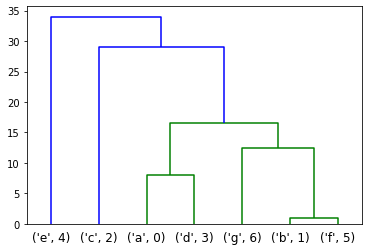

In [ ]:
import scipy
import scipy.cluster.hierarchy as sch
import matplotlib.pylab as plt

matr = [[0, 19, 27, 8, 33, 18, 13],
        [19, 0, 31, 18, 36, 1, 13],
        [27, 31, 0, 26, 41, 32, 29],
        [8, 18, 26, 0, 31, 17, 14],
        [33, 36, 41, 31, 0, 35, 28],
        [18, 1, 32, 17, 35, 0, 12],
        [13, 13, 29, 14, 28, 12, 0]
        ]

L = list(zip(map(chr, range(97, 97 + len(matr))), range(len(matr))))

D = scipy.spatial.distance.squareform(matr)
Z = sch.linkage(D, method='average')
P = sch.dendrogram(Z, labels=L)

In [ ]:
# Explanation

"""
matr = [[0, 19, 27, 8, 33, 18, 13],
        [19, 0, 31, 18, 36, 1, 13],
        [27, 31, 0, 26, 41, 32, 29],
        [8, 18, 26, 0, 31, 17, 14],
        [33, 36, 41, 31, 0, 35, 28],
        [18, 1, 32, 17, 35, 0, 12],
        [13, 13, 29, 14, 28, 12, 0]
        ]
"""

# D = scipy.spatial.distance.squareform(matr)
print(type(D))
print(D)

<class 'numpy.ndarray'>
[19 27  8 33 18 13 31 18 36  1 13 26 41 32 29 31 17 14 35 28 12]


In [ ]:
# help(scipy.spatial.distance.squareform)

In [ ]:
"""
D = [ 19.  27.   8.  33.  18.  13.  31.  18.  36.   1.  13.  26.  41.  32.  29. 31.  17.  14.  35.  28.  12.]
"""

# Z = sch.linkage(D, method='average')
print(type(Z))
print(Z)

for z in Z:
    a = z[0]
    b = z[1]
    h = z[2]
    print("leaf index {} and leaf {} are grouped at height {}".format(a, b, h))

<class 'numpy.ndarray'>
[[ 1.   5.   1.   2. ]
 [ 0.   3.   8.   2. ]
 [ 6.   7.  12.5  3. ]
 [ 8.   9.  16.5  5. ]
 [ 2.  10.  29.   6. ]
 [ 4.  11.  34.   7. ]]
leaf index 1.0 and leaf 5.0 are grouped at height 1.0
leaf index 0.0 and leaf 3.0 are grouped at height 8.0
leaf index 6.0 and leaf 7.0 are grouped at height 12.5
leaf index 8.0 and leaf 9.0 are grouped at height 16.5
leaf index 2.0 and leaf 10.0 are grouped at height 29.0
leaf index 4.0 and leaf 11.0 are grouped at height 34.0


In [ ]:
# help(sch.linkage)

In [ ]:
"""
Z = 
[[  1.    5.    1.    2. ]
 [  0.    3.    8.    2. ]
 [  6.    7.   12.5   3. ]
 [  8.    9.   16.5   5. ]
 [  2.   10.   29.    6. ]
 [  4.   11.   34.    7. ]]
"""

# P = sch.dendrogram(Z, labels=L)
print(type(P))
print(P)

<class 'dict'>
{'icoord': [[25.0, 25.0, 35.0, 35.0], [55.0, 55.0, 65.0, 65.0], [45.0, 45.0, 60.0, 60.0], [30.0, 30.0, 52.5, 52.5], [15.0, 15.0, 41.25, 41.25], [5.0, 5.0, 28.125, 28.125]], 'dcoord': [[0.0, 8.0, 8.0, 0.0], [0.0, 1.0, 1.0, 0.0], [0.0, 12.5, 12.5, 1.0], [8.0, 16.5, 16.5, 12.5], [0.0, 29.0, 29.0, 16.5], [0.0, 34.0, 34.0, 29.0]], 'ivl': [('e', 4), ('c', 2), ('a', 0), ('d', 3), ('g', 6), ('b', 1), ('f', 5)], 'leaves': [4, 2, 0, 3, 6, 1, 5], 'color_list': ['g', 'g', 'g', 'g', 'b', 'b']}


In [ ]:
# help(sch.dendrogram)

In [ ]:
# Binary Distance

b = [[1, 1, 1, 1],
     [0, 1, 0, 1],
     [0, 1, 1, 0],
     [0, 1, 1, 1],
]

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html
d = sch.distance.pdist(b, 'jaccard') # Try different distance methods
print(d)

[0.5        0.5        0.25       0.66666667 0.33333333 0.33333333]


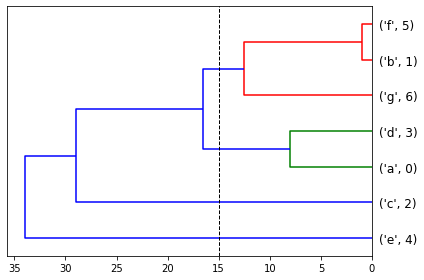

In [ ]:
upgma_threshold = 15

sch.dendrogram(Z, labels=L, color_threshold=upgma_threshold, orientation = 'left')
plt.axvline(x=upgma_threshold, linewidth=1, color='black', linestyle='--')

plt.tight_layout()
plt.show()
#plt.savefig('upgma.pdf', dpi=300) # pdf, png

### DBSCAN

The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density. 

https://www.youtube.com/watch?v=RDZUdRSDOok


Question: what is the difference between DBSCAN and k-means, if the same dataset is applied?

#### DBSCAN Example

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [ ]:
# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

In [ ]:
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [ ]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


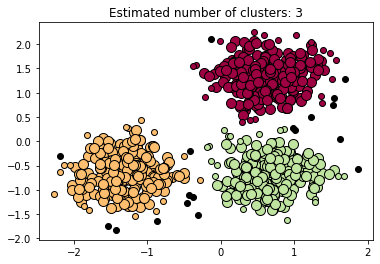

In [ ]:
# #############################################################################
# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

#### KMeans Example

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[1 0 1 2 1 0 0 2 1 1 0 0 0 2 0 1 0 0 0 2 2 2 2 2 0 0 2 1 1 2 1 0 0 1 0 1 2
 1 1 2 2 0 0 0 0 0 1 2 1 0 2 2 0 0 2 2 0 1 2 0 2 2 2 2 2 1 2 2 1 1 1 2 1 1
 2 0 1 0 1 2 0 0 1 1 1 1 0 2 0 2 2 1 0 1 0 1 0 0 1 1 2 0 2 1 2 2 2 2 1 1 1
 0 0 0 0 1 1 0 1 0 2 0 1 1 0 2 0 1 1 2 1 2 2 2 1 0 2 2 1 0 1 2 1 1 2 2 0 2
 0 1 2 0 0 2 2 2 1 0 1 0 1 0 1 2 2 0 0 2 2 0 1 0 2 2 2 0 0 2 2 1 0 2 1 1 2
 1 1 0 1 0 1 0 0 2 2 1 1 0 0 2 0 2 2 2 2 1 2 1 2 2 1 2 2 2 1 1 0 0 0 2 2 2
 2 0 2 2 1 1 2 1 1 1 0 1 0 0 0 2 0 0 1 0 2 2 0 2 2 0 1 1 0 0 0 1 0 1 2 1 2
 2 2 2 2 0 0 1 1 0 0 1 1 2 0 2 2 0 0 2 0 2 1 2 2 1 0 2 2 1 2 2 1 1 2 1 2 1
 2 0 1 1 1 0 2 0 2 2 1 2 2 1 1 2 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 2 1 0 2 2
 1 1 2 1 2 0 1 2 1 2 1 2 2 1 0 1 0 1 2 2 0 0 0 2 1 2 1 2 0 2 2 1 0 1 0 1 1
 1 1 2 1 2 1 0 1 0 2 0 0 0 1 0 0 1 2 0 1 2 2 0 0 2 2 2 0 2 0 2 1 2 0 2 0 1
 0 1 0 0 1 0 2 2 0 1 1 2 0 2 2 2 2 0 1 1 1 1 0 1 2 0 1 0 2 1 1 0 1 0 0 1 0
 1 2 2 2 0 0 2 1 0 1 1 0 1 0 0 2 2 0 1 0 2 2 0 0 0 0 1 1 1 2 2 0 2 0 1 1 0
 2 0 1 1 2 1 0 1 2 0 1 2 

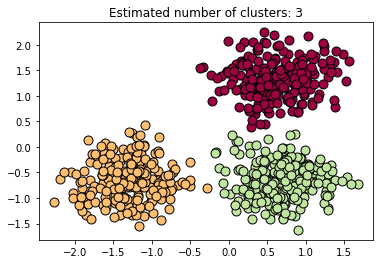

In [ ]:
k_unique_labels = set(kmeans.labels_)
k_colors = colors
for k, col in zip(k_unique_labels, k_colors):

    class_member_mask = labels == k

    xy = X[class_member_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=9,
    )

plt.title("Estimated number of clusters: %d" % len(k_unique_labels))
plt.show()